# Model
## iCGB21FR - Updated

In [2]:
from colorama import init, Fore, Style
from cobra import Model, Reaction
from cobra.io import read_sbml_model
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#### Add lysine export reaction to the model

In [3]:
model = read_sbml_model('/Users/macintosh/Downloads/iCGB21FR_updated.xml')

model

Name,iCBG21FR
Memory address,15e7d3610
Number of metabolites,1042
Number of reactions,1540
Number of genes,807
Number of groups,102
Objective expression,1.0*DAPDC - 1.0*DAPDC_reverse_d3ab8
Compartments,"cytosol, periplasm, extracellular space"


In [4]:
solution = model.optimize()
solution.fluxes

12DGR120tipp     0.000000
12DGR140tipp     0.000000
12DGR161tipp     0.000000
12DGR180tipp     0.000000
12DGR181tipp     0.000000
                  ...    
L_LACtex         0.000000
CYTB1           15.066667
EX_34dhbz_e     -2.466667
3_4DHBZt2        2.466667
LYSt3r           9.433333
Name: fluxes, Length: 1540, dtype: float64

In [5]:
model.summary()

Metabolite,Reaction,Flux,C-Number,C-Flux
34dhbz_e,EX_34dhbz_e,2.467,7,21.13%
glc__D_e,EX_glc__D_e,10,6,73.44%
h_e,EX_h_e,1.9,0,0.00%
nh4_e,EX_nh4_e,10,0,0.00%
o2_e,EX_o2_e,10,0,0.00%
urea_e,EX_urea_e,4.433,1,5.43%
Metabolite,Reaction,Flux,C-Number,C-Flux
co2_e,EX_co2_e,-25.1,1,30.72%
h2o_e,EX_h2o_e,-25.23,0,0.00%
lys__L_e,EX_lys__L_e,-9.433,6,69.28%


In [6]:
for metabolite in model.metabolites.query('Lys', 'name'):
    print(metabolite.name)
    print(metabolite.id)

L-Lysine
lys__L_c
L-Lysine
lys__L_e
L-Lysine
lys__L_p


In [7]:
model.metabolites.get_by_id('lys__L_c')

Metabolite identifier,lys__L_c
Name,L-Lysine
Memory address,0x16ac6c550
Formula,C6H15N2O2
Compartment,c
In 6 reaction(s),"Growth, DAPDC, LYSabc, LYSt3r, LYSabcpp, LYSt3pp"


In [8]:
model.metabolites.lys__L_c.reactions

frozenset({<Reaction DAPDC at 0x16c229250>,
           <Reaction Growth at 0x175a67fd0>,
           <Reaction LYSabc at 0x16c7b6750>,
           <Reaction LYSabcpp at 0x16c7a77d0>,
           <Reaction LYSt3pp at 0x16c7b75d0>,
           <Reaction LYSt3r at 0x175ae30d0>})

In [9]:
for reaction in model.metabolites.lys__L_c.reactions:
    print(reaction.id, reaction, reaction.name)

Growth Growth: 0.000215957436615497 10fthf_c + 0.497466186805283 ala__L_c + 0.000215957436615497 amet_c + 0.0062974490405647 amp_c + 0.286450592337987 arg__L_c + 0.233442241629366 asn__L_c + 0.233442241629366 asp__L_c + 52.4155146188655 atp_c + 0.0542420540814976 ca2_c + 0.0613181689413663 cl_c + 0.00284729052433628 coa_c + 0.129291683621802 ctp_c + 0.0342100689811831 cu2_c + 0.0886878118620952 cys__L_c + 0.0114582929862282 datp_c + 0.0144799266879183 dctp_c + 0.0127140840198214 dgtp_c + 0.0117989352923303 dttp_c + 0.000215957436615497 fad_c + 0.0389276218726522 fe2_c + 0.0389276218726522 fe3_c + 0.254849143586252 gln__L_c + 0.0148774528144029 glu__L_c + 0.593290278265672 gly_c + 0.208303052853126 gtp_c + 47.0666420920129 h2o_c + 2.15678814560218 h_c + 0.0917460790586501 his__L_c + 0.281353803150062 ile__L_c + 0.0556012165101363 k_c + 0.436302779712182 leu__L_c + 0.332323631867312 lys__L_c + 0.14883244216901 met__L_c + 0.0894430382011216 mg2_c + 0.000215957436615497 mlthf_c + 0.0395702

In [10]:
model.reactions.DAPDC

Reaction identifier,DAPDC
Name,Diaminopimelate decarboxylase
Memory address,0x16c229250
Stoichiometry,"26dap__M_c + h_c --> co2_c + lys__L_c Meso-2,6-Diaminoheptanedioate + H+ --> CO2 + L-Lysine"
GPR,lcl_NC_006958_1_prot_WP_011014180_1_1145 or lcl_NC_006958_1_prot_WP_011265883_1_2027
Lower bound,0.0
Upper bound,1000.0


### Changing the objective function
Determine the maximum possible production rate of lysine

In [11]:
with model:
    model.objective = model.reactions.EX_lys__L_e
    print(model.optimize().objective_value)

9.43333333333333


The maximum prosible production rate of lysine with iCGB21FR is 9.43

### Model Fluxes Check

In [12]:
model.optimize()

,fluxes,reduced_costs
12DGR120tipp,0.000000,-5.551115e-17
12DGR140tipp,0.000000,-5.551115e-17
12DGR161tipp,0.000000,0.000000e+00
12DGR180tipp,0.000000,0.000000e+00
12DGR181tipp,0.000000,2.775558e-17
...,...,...
L_LACtex,0.000000,0.000000e+00
CYTB1,15.066667,8.891800e-17
EX_34dhbz_e,-2.466667,0.000000e+00
3_4DHBZt2,2.466667,0.000000e+00


In [13]:
solution = model.optimize()

In [14]:
solution.fluxes

12DGR120tipp     0.000000
12DGR140tipp     0.000000
12DGR161tipp     0.000000
12DGR180tipp     0.000000
12DGR181tipp     0.000000
                  ...    
L_LACtex         0.000000
CYTB1           15.066667
EX_34dhbz_e     -2.466667
3_4DHBZt2        2.466667
LYSt3r           9.433333
Name: fluxes, Length: 1540, dtype: float64

In [15]:
type(solution.fluxes)

pandas.core.series.Series

In [16]:
solution.fluxes.describe()

count    1540.000000
mean        0.152381
std         2.259884
min       -25.233333
25%         0.000000
50%         0.000000
75%         0.000000
max        25.233333
Name: fluxes, dtype: float64

#### Histogram of the distribution of flux values:

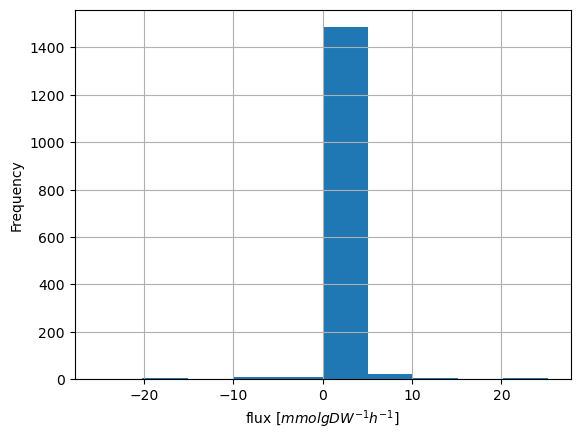

In [17]:
fig = solution.fluxes.hist()
fig.set_xlabel('flux [$mmol gDW^{-1} h^{-1}]$')
fig.set_ylabel('Frequency');

In [18]:
solution.fluxes[solution.fluxes != 0.]

3OADPCOAT       2.466667
3OXCOAT         2.466667
4CMLCL_kt       2.466667
ACCOAL          9.433333
ACONT           1.233333
                 ...    
SUCDi           3.700000
CYTB1          15.066667
EX_34dhbz_e    -2.466667
3_4DHBZt2       2.466667
LYSt3r          9.433333
Name: fluxes, Length: 83, dtype: float64

The model is checked for fluxes